<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal9
### Axel Nathanel Nahum


## Introduccion

En este $Jupyter$ nos encontraremos con la resolucion de los $ejercicios$ $1$ y $2$ de la $TS9$. En este caso nos encontramos con la $sintesis$ de $circuitos$ a partir de la funcion inmitancia dada, sea una $impedancia$ o $admitancia$. Esto se realiza mediante los metodos de $foster$ y $cauer$. Ademas estaran las $resoluciones$ de cada ejercicio y ademas el codigo de verificacion.

<img src="./Enunciado.PNG" align="middle" width="1000" /> 

## Resolucion

### Resolucion ejercicio 1

In [67]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ1_.pdf", width=900, height=1000)

### Resolucion ejercicio 2

In [68]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ2.pdf", width=900, height=1000)

## Punto A)

In [10]:
import sympy as sp
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.general import print_latex

# Resolución simbólica

s = sp.symbols('s ', complex=True)   # Variable S

# Sea la siguiente función de excitación

ZZ = (s**2+3)*(s**2+1)/(s*(s**2+2))

### Foster Serie

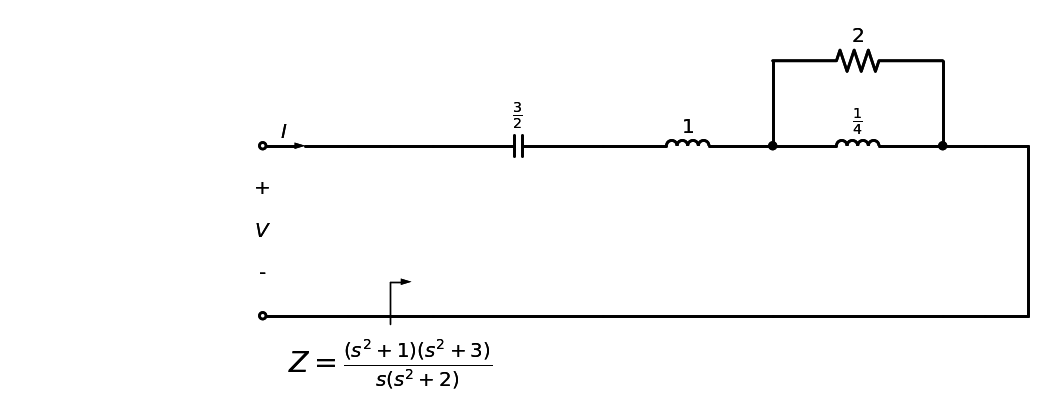

[[4, 2]]


In [65]:
# a) ZZ según Foster derivación

# Implementaremos Imm mediante Foster
k0, koo, ki = foster(ZZ)

dibujar_foster_serie(k0, koo, ki, z_exc = ZZ)

print(ki)

### Foster Paralelo

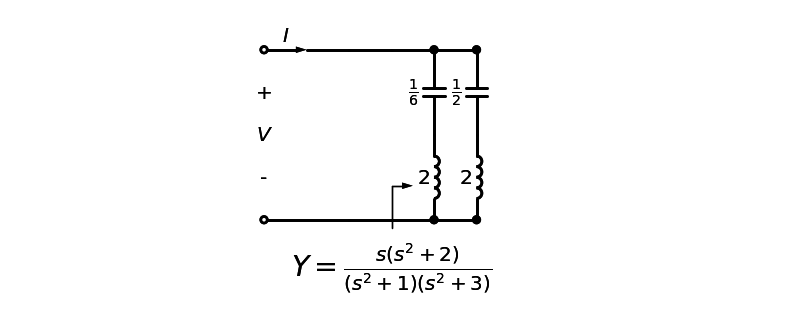

In [12]:
# Implementaremos Imm mediante Foster

k0, koo, ki = foster(1/ZZ)

dibujar_foster_derivacion(k0, koo, ki, y_exc = 1/ZZ)

## Punto B)

### Cauer 1

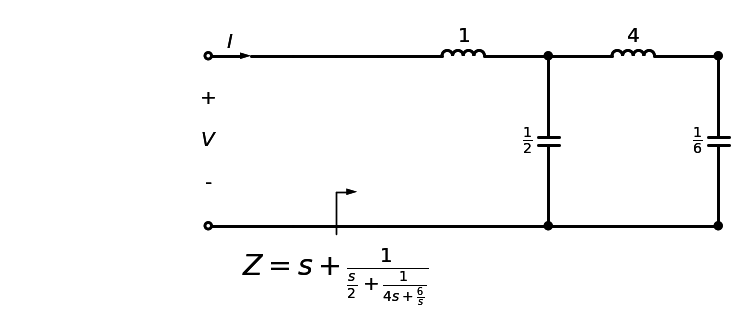

In [14]:
# b) ZZ según Cauer1 (removiendo en oo) 

koo, imm_cauer_oo, rem = cauer_LC(ZZ, remover_en_inf=True)

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(koo, z_exc = imm_cauer_oo)

### Cauer 2

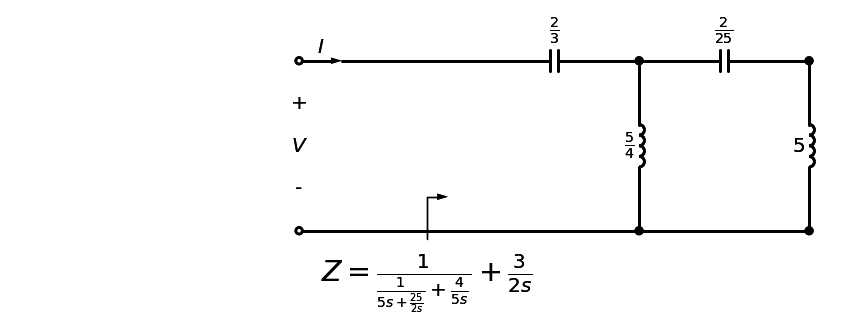

In [15]:
# b) ZZ según Cauer2 (removiendo en 0) 
k0, imm_cauer_0, rem = cauer_LC(ZZ, remover_en_inf=False)

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(k0, z_exc = imm_cauer_0)

## Ejercicio 2

In [48]:
import sympy as sp
from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie,  dibujar_tanque_derivacion,  dibujar_espacio_derivacion, Capacitor, Drawing

# Resolución simbólica

s = sp.symbols('s ', complex=True)

YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

In [49]:
# Restricción circuital: L2*C2 = 1 r/s
# remoción parcial en infinito de 1/YY

omega_L2C2 = 1   # Omega de resonancia

Z2, Zc1 = remover_polo_dc(1/YY, omega_zero = omega_L2C2)

# Yc1 es la admitancia removida
# extraigo C1

C1 = 1/(s*Zc1)

Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

# quedaría solo un tanque en Y4, no especifico omega.
Y6, Zt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

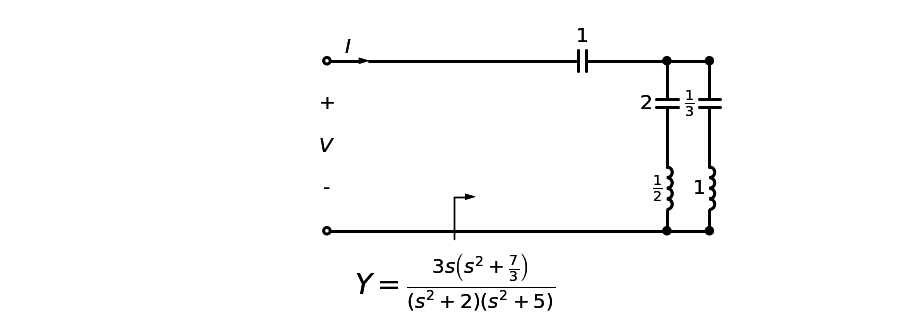

In [61]:
# Dibujamos la red resultante:

#d = dibujar_puerto_entrada('', voltage_lbl = ('+', '$V$', '-'), current_lbl = '$I$')

d = Drawing(unit=4)

d = dibujar_puerto_entrada(d, voltage_lbl = ('+', '$V$', '-'), current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 'Y', YY, hacia_salida = True, k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, L3, C3)

display(d)

En los $circuitos$ se puede ver como lo hecho a $mano$, verfica con lo hayado por las funciones de $python$.